In [95]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size' : 14
})


In [96]:
# df = pd.read_csv("log/describe_all_gpu.csv")
df = pd.read_csv("log/describe_all_cpu_ruche.csv")
df

,global_size,nx,nvx,kernel,error_mean,error_std,runtime_mean,runtime_std,cellspersec_mean,cellspersec_std,throughput_mean,throughput_std,gpu
0,4096,64,64,BasicRange2D,3.523250e-04,0.000000e+00,0.209933,0.051004,0.020659,0.005137,0.330547,0.082195,0
1,16384,128,128,BasicRange2D,1.952420e-05,0.000000e+00,0.300601,0.067272,0.056848,0.011106,0.909569,0.177700,0
2,65536,256,256,BasicRange2D,9.115920e-07,0.000000e+00,0.516127,0.077787,0.130257,0.023174,2.084114,0.370783,0
3,262144,512,512,BasicRange2D,2.507810e-08,3.376951e-24,1.207007,0.171045,0.221043,0.028620,3.536694,0.457926,0
4,1048576,1024,1024,BasicRange2D,7.845860e-10,0.000000e+00,3.896533,0.139676,0.269428,0.009388,4.310845,0.150206,0
5,4194304,1024,4096,BasicRange2D,7.845940e-10,0.000000e+00,14.949072,0.617638,0.281006,0.010931,4.496099,0.174890,0
6,8388608,1024,8192,BasicRange2D,7.845940e-10,0.000000e+00,31.368080,1.449814,0.267954,0.011921,4.287259,0.190741,0
7,16777216,1024,16384,BasicRange2D,7.845940e-10,0.000000e+00,64.184128,1.241607,0.261485,0.005013,4.183760,0.080202,0
8,33554432,1024,32768,BasicRange2D,7.845940e-10,0.000000e+00,127.036240,2.748432,0.264250,0.005658,4.228004,0.090532,0
9,67108864,1024,65536,BasicRange2D,7.845940e-10,0.000000e+00,254.604360,3.683918,0.263634,0.003815,4.218142,0.061046,0


In [97]:
kernels_name = df["kernel"].unique()

values = {
    #'kernel_name': [value1, value2, value3]
}
# sizes = list(df["global_size"].unique())
# sizes.reverse()

for kernel_type in kernels_name:
     one_kernel = df[df["kernel"] == kernel_type]
     
    #  values[kernel_type] = one_kernel['cellspersec_mean']
     values[kernel_type] = (one_kernel["global_size"], one_kernel['cellspersec_mean'])
     

# display(sizes)

display(values)

{'BasicRange2D': (0          4096
  1         16384
  2         65536
  3        262144
  4       1048576
  5       4194304
  6       8388608
  7      16777216
  8      33554432
  9      67108864
  10    134217728
  Name: global_size, dtype: int64,
  0     0.020659
  1     0.056848
  2     0.130257
  3     0.221043
  4     0.269428
  5     0.281006
  6     0.267954
  7     0.261485
  8     0.264250
  9     0.263634
  10    0.263750
  Name: cellspersec_mean, dtype: float64),
 'BasicRange1D': (11         4096
  12        16384
  13        65536
  14       262144
  15      1048576
  16      4194304
  17      8388608
  18     16777216
  19     33554432
  20     67108864
  21    134217728
  22    268435456
  Name: global_size, dtype: int64,
  11    0.026173
  12    0.093530
  13    0.219249
  14    0.352379
  15    0.557880
  16    0.582102
  17    0.584828
  18    0.588087
  19    0.589420
  20    0.589594
  21    0.590903
  22    0.591279
  Name: cellspersec_mean, dtype: float64),
 'Hiera

BasicRange2D
BasicRange1D
Hierarchical
Scoped
NDRange


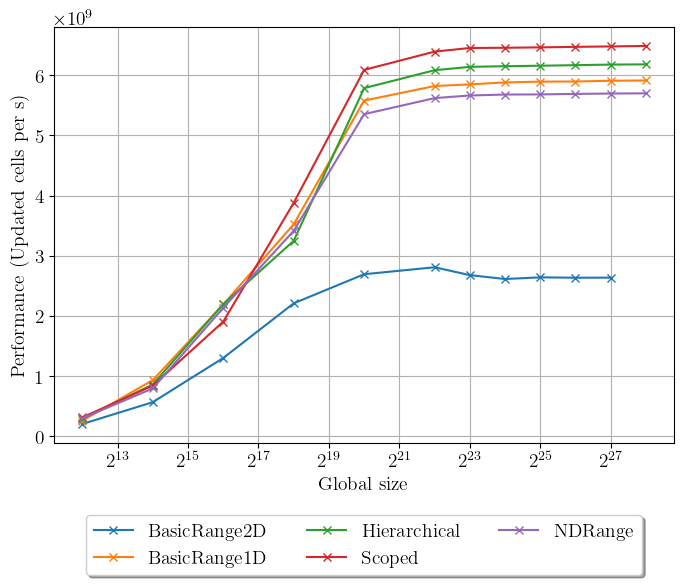

In [104]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(8,6))


# for i in range(len(df)):
#     kernel = row['kernel']
    
#     sizes = []
#     perfs = []

#     while kernel == row['kernel']:
#         sizes.append(row['global_size'])
#         perfs.append(row['cellspersec_mean'])
    
#     ax.plot(sizes, perfs*10e9, 'x-', label=kernel)

# Tracer les données
for key, data in values.items():
    sizes, perf = data
    print(key)
    # if(key == "Scoped"):
        # for p in perf:
            # print(f"{key} - {perf}")
    ax.plot(sizes, perf*10e9, 'x-', label=key)
    ax.loglog
ax.set_xscale('log', base=2)
# ax.set_yscale('log', base=10)

# Configurer les axes et la légende
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)

plt.xlabel('Global size')
plt.ylabel('Performance (Updated cells per s)')
# plt.yscale('log')  # Utiliser l'échelle logarithmique sur l'axe des y
# plt.legend()

# Ajouter une grille
plt.grid(True) 
# Afficher le graphique
plt.show()

In [99]:
KERNEL_TYPE = "Hierarchical"


same_kernel = df[df['kernel']==KERNEL_TYPE]
same_kernel

,global_size,nx,nvx,kernel,error_mean,error_std,runtime_mean,runtime_std,cellspersec_mean,cellspersec_std,throughput_mean,throughput_std,gpu
23,4096,64,64,Hierarchical,3.523250e-04,0.000000e+00,0.159883,0.065766,0.029338,0.009927,0.469404,0.158824,0
24,16384,128,128,Hierarchical,1.952420e-05,0.000000e+00,0.214940,0.078792,0.086235,0.030099,1.379766,0.481580,0
25,65536,256,256,Hierarchical,9.115920e-07,0.000000e+00,0.314723,0.070475,0.219712,0.054601,3.515400,0.873621,0
26,262144,512,512,Hierarchical,2.507810e-08,3.376951e-24,0.847380,0.171849,0.324863,0.081185,5.197802,1.298966,0
27,1048576,1024,1024,Hierarchical,7.845860e-10,0.000000e+00,1.812848,0.031337,0.578576,0.009761,9.257209,0.156171,0
28,4194304,1024,4096,Hierarchical,7.845940e-10,0.000000e+00,6.894740,0.032267,0.608347,0.002835,9.733549,0.045365,0
29,8388608,1024,8192,Hierarchical,7.845940e-10,0.000000e+00,13.663784,0.086816,0.613953,0.003817,9.823253,0.061076,0
30,16777216,1024,16384,Hierarchical,7.845940e-10,0.000000e+00,27.279460,0.061555,0.615016,0.001381,9.840255,0.022093,0
31,33554432,1024,32768,Hierarchical,7.845940e-10,0.000000e+00,54.489340,0.075908,0.615799,0.000856,9.852789,0.013696,0
32,67108864,1024,65536,Hierarchical,7.845940e-10,0.000000e+00,108.809000,0.128487,0.616759,0.000727,9.868146,0.011631,0


In [100]:
sizes = same_kernel['global_size']

gbs = same_kernel['throughput_mean']
gbs_std = same_kernel['throughput_std']

errors = same_kernel['error_mean']
errors_std = same_kernel['error_std']

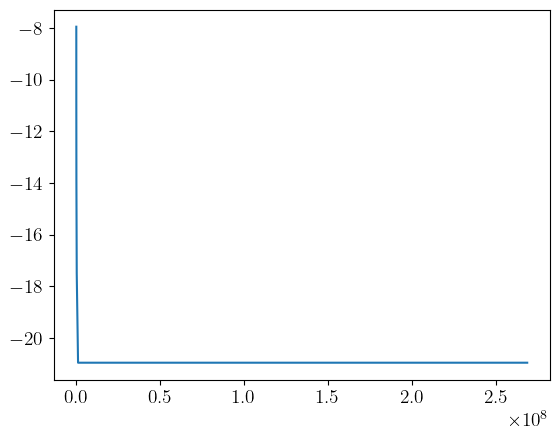

In [101]:
plt.plot(sizes, np.log(errors))